# Credit Card Fraud Detection using Machine Learning

### Import libraries

In [120]:
import pandas as pd 
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
import keras
from keras.models import Sequential
from keras.layers import Dense, InputLayer, Dropout, Flatten, Activation, Input
from sklearn.ensemble import IsolationForest
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
import matplotlib as mpl

### Import dataset (https://www.kaggle.com/mlg-ulb/creditcardfraud)

In [95]:
df = pd.read_csv('creditcard.csv')
df = df.dropna()
df = df.drop('Time', axis = 1)

### Investigate Class Sizes

In [96]:
groups = df.groupby('Class')

fraud = (groups.get_group(1).shape[0] / df.shape[0]) * 100
non_fraud = (groups.get_group(0).shape[0] / df.shape[0]) * 100

print('Percent Fraud: ' + str(fraud) + '%')
print('Percent Not Fraud ' + str(non_fraud) + '%')

Percent Fraud: 0.1727485630620034%
Percent Not Fraud 99.82725143693798%


### Split data into a train and holdout set

In [98]:
df_size = df.shape[0]
test_size = int(df_size * .3)
train_size = df_size - test_size

train_df = df.head(train_size)
test_df = df.tail(test_size)

X_train = train_df.drop('Class', axis = 1)
Y_train = train_df['Class']
X_test = test_df.drop('Class', axis = 1)
Y_test = test_df['Class']

In [130]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

'''
for feature in X_train.columns.values:
        X_train[feature] = StandardScaler().fit_transform(X_train[feature].values.reshape(-1,1))
        X_test[feature] = StandardScaler().fit_transform(X_test[feature].values.reshape(-1,1))
'''

'\nfor feature in X_train.columns.values:\n        X_train[feature] = StandardScaler().fit_transform(X_train[feature].values.reshape(-1,1))\n        X_test[feature] = StandardScaler().fit_transform(X_test[feature].values.reshape(-1,1))\n'

### Fit Random Forest Classifier

In [142]:
clf = RandomForestClassifier()
clf.fit(X_train, Y_train)

RandomForestClassifier()

In [143]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

probabilities = clf.predict_proba(X_test)
y_pred = probabilities[:,1]
fpr, tpr, thresholds_keras = roc_curve(Y_test, y_pred)
auc_val = auc(fpr, tpr)

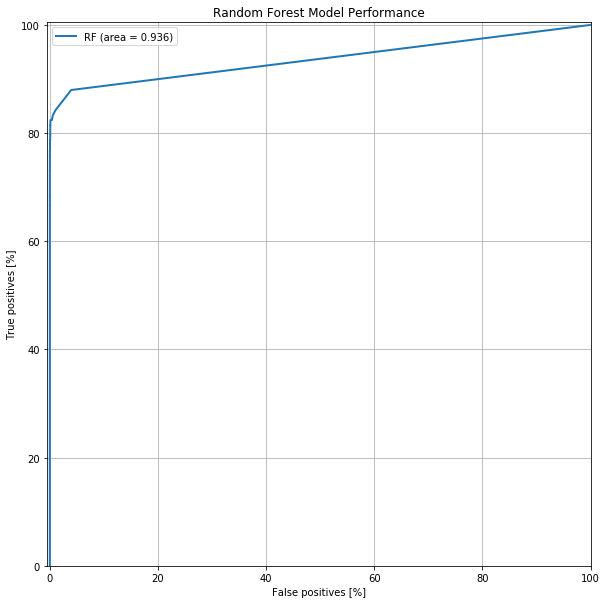

In [144]:
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

name = 'RF'
plt.plot(100*fpr, 100*tpr, label= name + ' (area = {:.3f})'.format(auc_val), linewidth=2, color = colors[0])
plt.xlabel('False positives [%]')
plt.ylabel('True positives [%]')
plt.xlim([-0.5,100])
plt.ylim([0,100.5])
plt.grid(True)
ax = plt.gca()
ax.set_aspect('equal')
plt.title('Random Forest Model Performance')
plt.legend(loc='best')

In [101]:
clf = CatBoostClassifier()
clf.fit(X_train, Y_train)

Learning rate set to 0.098829
0:	learn: 0.3667941	total: 39.4ms	remaining: 39.3s
1:	learn: 0.2004147	total: 75.8ms	remaining: 37.8s
2:	learn: 0.1079386	total: 113ms	remaining: 37.4s
3:	learn: 0.0605539	total: 142ms	remaining: 35.4s
4:	learn: 0.0362525	total: 171ms	remaining: 34.1s
5:	learn: 0.0229839	total: 205ms	remaining: 34s
6:	learn: 0.0153652	total: 239ms	remaining: 33.8s
7:	learn: 0.0109089	total: 271ms	remaining: 33.6s
8:	learn: 0.0082794	total: 300ms	remaining: 33.1s
9:	learn: 0.0066906	total: 330ms	remaining: 32.6s
10:	learn: 0.0055009	total: 358ms	remaining: 32.2s
11:	learn: 0.0047366	total: 387ms	remaining: 31.9s
12:	learn: 0.0041966	total: 424ms	remaining: 32.2s
13:	learn: 0.0038355	total: 453ms	remaining: 31.9s
14:	learn: 0.0035342	total: 483ms	remaining: 31.7s
15:	learn: 0.0033147	total: 512ms	remaining: 31.5s
16:	learn: 0.0031643	total: 542ms	remaining: 31.4s
17:	learn: 0.0030396	total: 571ms	remaining: 31.2s
18:	learn: 0.0029162	total: 602ms	remaining: 31.1s
19:	learn: 

In [102]:
y_pred = clf.predict(X_test, prediction_type='RawFormulaVal')

In [103]:
fpr, tpr, thresholds_keras = roc_curve(Y_test, y_pred)
auc_val = auc(fpr, tpr)

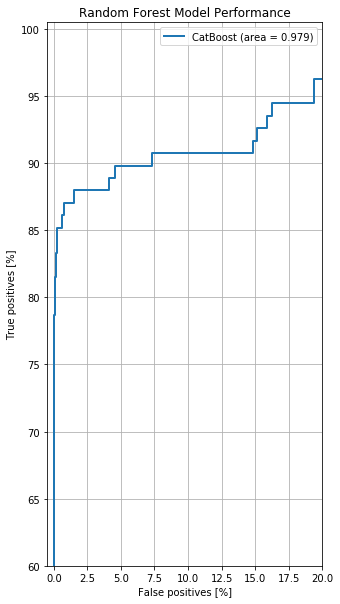

In [113]:
name = 'CatBoost'
plt.plot(100*fpr, 100*tpr, label= name + ' (area = {:.3f})'.format(auc_val), linewidth=2, color = colors[0])
plt.xlabel('False positives [%]')
plt.ylabel('True positives [%]')
plt.xlim([-0.5,20])
plt.ylim([60,100.5])
plt.grid(True)
ax = plt.gca()
ax.set_aspect('equal')
plt.title('Random Forest Model Performance')
plt.legend(loc='best')

In [137]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
    ]

model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics = METRICS)

In [138]:
print(X_train.shape[1])

30


In [139]:
model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
6231/6231 [==============================] - 10s 2ms/step - loss: 0.0112 - tp: 208.0000 - fp: 231.0000 - tn: 198750.0000 - fn: 176.0000 - accuracy: 0.9980 - precision: 0.4738 - recall: 0.5417 - auc: 0.8816
Epoch 2/10
6231/6231 [==============================] - 10s 2ms/step - loss: 0.0046 - tp: 251.0000 - fp: 58.0000 - tn: 198923.0000 - fn: 133.0000 - accuracy: 0.9990 - precision: 0.8123 - recall: 0.6536 - auc: 0.9398
Epoch 3/10
6231/6231 [==============================] - 10s 2ms/step - loss: 0.0041 - tp: 276.0000 - fp: 59.0000 - tn: 198922.0000 - fn: 108.0000 - accuracy: 0.9992 - precision: 0.8239 - recall: 0.7188 - auc: 0.9413
Epoch 4/10
6231/6231 [==============================] - 10s 2ms/step - loss: 0.0040 - tp: 284.0000 - fp: 52.0000 - tn: 198929.0000 - fn: 100.0000 - accuracy: 0.9992 - precision: 0.8452 - recall: 0.7396 - auc: 0.9428
Epoch 5/10
6231/6231 [==============================] - 10s 2ms/step - loss: 0.0037 - tp: 281.0000 - fp: 44.0000 - tn: 198937.0000 - fn

In [140]:
y_pred = model.predict(X_test).ravel()
fpr, tpr, thresholds_keras = roc_curve(Y_test, y_pred)
auc_val = auc(fpr, tpr)

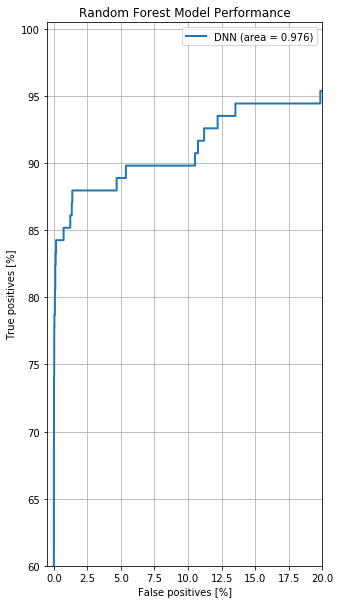

In [141]:
name = 'DNN'
plt.plot(100*fpr, 100*tpr, label= name + ' (area = {:.3f})'.format(auc_val), linewidth=2, color = colors[0])
plt.xlabel('False positives [%]')
plt.ylabel('True positives [%]')
plt.xlim([-0.5,20])
plt.ylim([60,100.5])
plt.grid(True)
ax = plt.gca()
ax.set_aspect('equal')
plt.title('Random Forest Model Performance')
plt.legend(loc='best')

In [131]:
iforest = IsolationForest()

In [132]:
iforest.fit(X_train)

IsolationForest()

In [133]:
y_pred = - iforest.decision_function(X_test)

In [134]:
fpr, tpr, thresholds_keras = roc_curve(Y_test, y_pred)
auc_val = auc(fpr, tpr)

In [135]:
print(auc_val)

0.9314100410673876


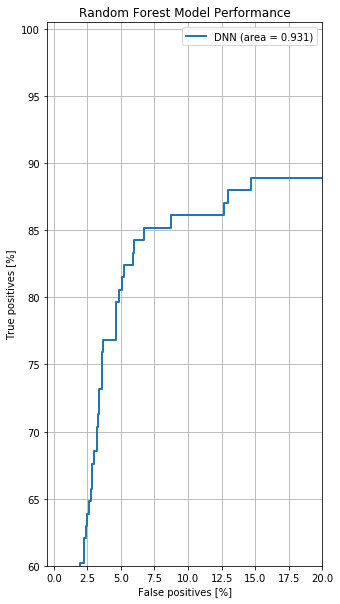

In [136]:
name = 'DNN'
plt.plot(100*fpr, 100*tpr, label= name + ' (area = {:.3f})'.format(auc_val), linewidth=2, color = colors[0])
plt.xlabel('False positives [%]')
plt.ylabel('True positives [%]')
plt.xlim([-0.5,20])
plt.ylim([60,100.5])
plt.grid(True)
ax = plt.gca()
ax.set_aspect('equal')
plt.title('Random Forest Model Performance')
plt.legend(loc='best')